<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Final Examination - XYZ Carseats Prediction

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

In [2]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, accuracy_score

In [4]:
# Importing datasets 
path_fredrik = "C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedMachineLearning/Data/"
path_guest = ""

os.chdir(path_fredrik)
path = os.getcwd()
print(path)

df = pd.read_csv("Carseats.csv")
df.head()

C:\Users\fredr\OneDrive\Documents\Master\Semester_3\Applied ML\AppliedMachineLearning\Data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [34]:
#checking for missing values
print('==== Complete Data ====')
print(df.isna().sum())

==== Complete Data ====
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


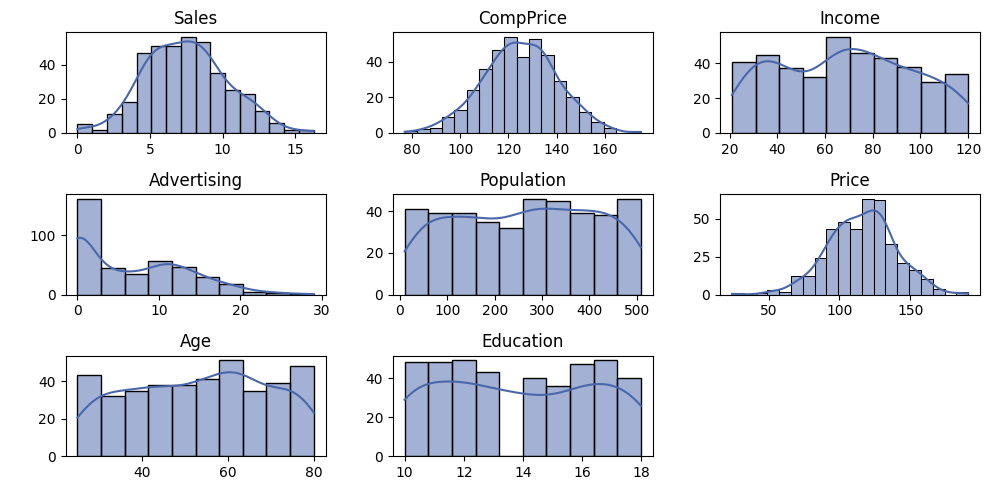

In [17]:
# Visualizing numerical features
num_features = df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

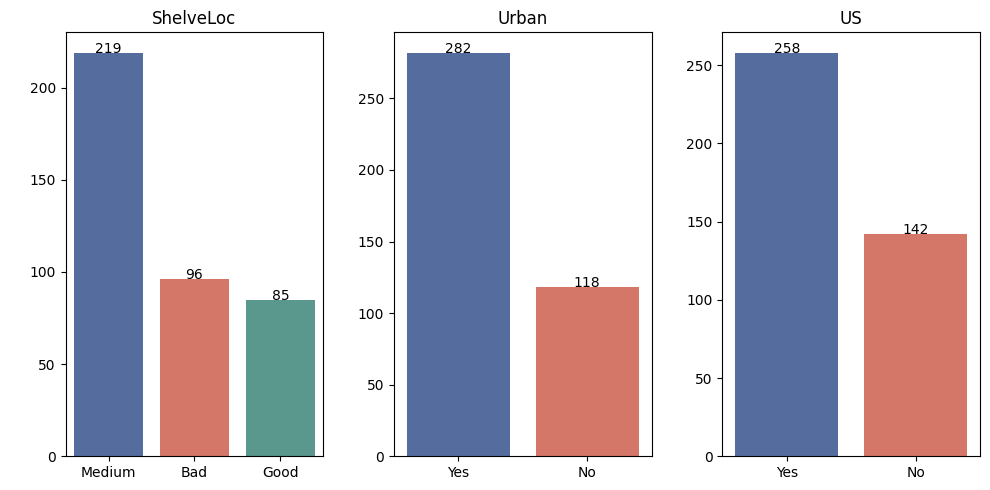

In [18]:
# Visualizing categorical features
cat_features = df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()